In [1]:
import sys
try:
    from google.colab import drive
    drive.mount('/content/drive')
    sys.path.append('/content/drive/My Drive/RadishLab')
    COLABORATORY = True
except ImportError:
    COLABORATORY = False
    sys.path.append('./rdlib')
import rdlib.rdlib41 as rd

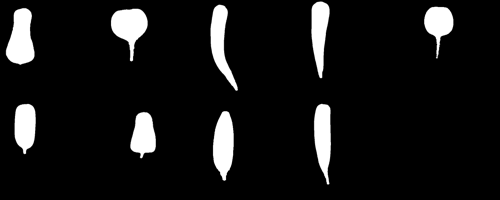

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# サンプルの画像フォルダのパス
if COLABORATORY:
    SF = '/content/drive/My Drive/RadishLab/RDSamples/silhoette' # シルエット画像フォルダ
    MSF = '/content/drive/My Drive/RadishLab/RDSamples/silhoetteM' # 原画像フォルダ
    SRCF =  '/content/drive/My Drive/RadishLab/RDSamples/silhoetteM' # マージン
    MSRCF =  '/content/drive/My Drive/RadishLab/RDSamples/silhoetteM'
else:
    DATAFOLDER = 'RDSamples/silhoette'
# 指定フォルダ内の画像を収集
imgs = rd.collectimages(DATAFOLDER)
rd.makethumbnail(DATAFOLDER)

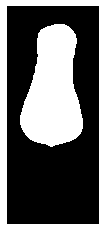

In [3]:
imgs = [rd.cutmargin(img,mm=50) for img in imgs]


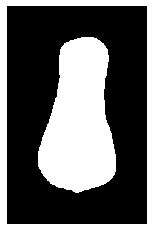

In [21]:
img = cv2.imread('RDSamples/original/cropped.jpg')
bimg = rd.getMajorWhiteArea(img=imgs[0],dilation=0,order=1,binary=True)
bimg = rd.cutmargin(bimg,mm=50)
rd.plotimg(bimg)

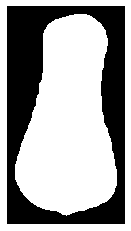

In [26]:
cimg = rd.cutmargin(bimg,mm=10)
rd.plotimg(cimg)

In [6]:
bimg.shape

(329, 134)

In [7]:
cv2.goodFeaturesToTrack()
gray = cv2.cvtColor(img[0],cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plt.imshow(img),plt.show()

TypeError: goodFeaturesToTrack() missing required argument 'image' (pos 1)

In [ ]:
!python -m iGrabit